[[14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 [13.84   13.94    0.8955 ...  2.259   4.805   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


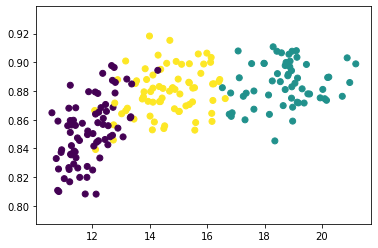

In [20]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(seeds)
labels=model.predict(seeds)
print(seeds)
import matplotlib.pyplot as plt
xs=seeds[:,0] #0th column of the array
ys=seeds[:,2] #2nd column of the array
plt.scatter(xs, ys, c=labels)

### Column 0'ı x, column 1'i y ekseninde kümelendiriyor. Kmeans ile kümeleme işlemlerinde centroidleri bulmak için:


In [21]:
# Import pyplot
from matplotlib import pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

NameError: name 'new_points' is not defined

# EVALUATING A CLUSTERING

In [ ]:
import pandas as pd
df=pd.DataFrame({'labels': labels, 'species'= species})
print(df)
# And then create two column dataframe
# Pandas crosstab function:
ct=pd.crosstab(df['labels'],df['species'])


## Measuring the quality of the clustering

##### Inertia measures clustering quality-lower is better
A good clustering has tight clusters(so low inertia)
but not too many clusters!

In [ ]:
from sklearn.cluster import KMeans

model= KMeans(n_clusters=3)
model.fit(samples)
print(model.inetria_)

##### How many clusters?
Choose an "elbow" point in the inertia point that is where inertia begins to decrease more slowly!

#### How many clusters of grain?
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the UCI Machine Learning Repository.
For each of the given values of k, perform the following steps:
Create a KMeans instance called model with k clusters.
Fit the model to the grain data samples.
Append the value of the inertia_ attribute of model to the list inertias.
The code to plot ks vs inertias has been written for you, so hit 'Submit Answer' to see the plot!

In [6]:
import zipfile as zf
files = zf.ZipFile("Grains.zip", 'r')
files.extractall()
files.close()

In [36]:
seeds

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [45]:
seeds=pd.read_csv('seeds.csv')
seeds_length_and_width=pd.read_csv('seeds-width-vs-length.csv')
seeds.columns = ['0','1', '2','3','4','5','6','7']
seeds_length_and_width.columns=['0','1']

print(seeds)
print(seeds_length_and_width)

         0      1       2      3      4      5      6  7
0    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4    14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1
..     ...    ...     ...    ...    ...    ...    ... ..
204  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
205  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
206  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
207  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
208  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[209 rows x 8 columns]
         0      1
0    3.333  5.554
1    3.337  5.291
2    3.379  5.324
3    3.562  5.658
4    3.312  5.386
..     ...    ...
204  2.981  5.137
205  2.795  5.140
206  3.232  5.236
207  2.836  5.175
208  2.974  5.243

[209 rows x 2 columns]


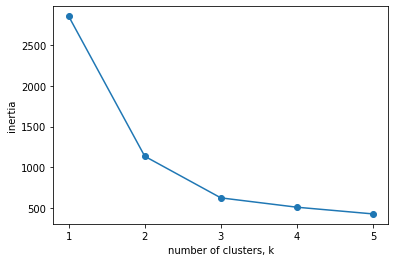

In [22]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(seeds)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


#### Evaluating the grain clustering
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

Instructions
100 XP
Instructions
100 XP
Create a KMeans model called model with 3 clusters.
Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
Hit 'Submit Answer' to see the cross-tabulation!

In [84]:
df=seeds.iloc[:,7].values
df
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(seeds)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': df})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties   1   2   3
labels               
0           5   0  70
1          63  10   0
2           1  60   0


In [82]:
df.shape

(209,)

In [78]:
labels.shape

(209,)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

## Transforming Features for better clustering
-178 samples from 3 distinct varieties of red wine: Barolo, Grignolia and Barbera
-Features measure chemical composition
-Visual properties like "color intensity"

In [92]:
wine=pd.read_csv('wine.csv')
wine

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,Barbera,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,Barbera,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Clustering the wines

In [105]:
wine=wine.drop('class_name',axis=1)
varieties=wine.iloc[:,0].values
varieties.shape
df=pd.DataFrame({'labels': labels, 'varieties':varieties})
ct=pd.crosstab(df['labels'],df['varieties'])
print(ct)

from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
labels=model.fit_predict(wine)

varieties   1   2   3
labels               
0          13  20  29
1          46   1   0
2           0  50  19


##### FEATURE VARIANCE and StandardScalar
variance of a feature measures spread of its values
In kmeans: feature variance= feature influence
StandardScalar transforms each feature to have mean 0 and variance 1.

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler=StandardScaler()
kmeans=KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(wine)
labels=pipeline.predict(wine)


#### With feature standardization:

In [112]:
df=pd.DataFrame({'labels': labels, 'varieties':varieties})
ct=pd.crosstab(df['labels'],df['varieties'])
print(ct)

varieties   1   2   3
labels               
0           0  68   0
1           0   1  48
2          59   2   0


In [172]:
df=pd.read_csv('fish.csv')
df=df.iloc[:,0]

In [175]:
species=df.values
species

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Pike', 'Pike', 'Pike', 'Pike',
       'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike',
       'Pike', 'Pike', 'Pike', 'Pike', 'Pike'], dtype=object)

In [176]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(fish)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0     17     14
1           33     0      3      0
2            0    17      0      0


#### 4 cluster oluşturmak istiyorsak n_custers=4 demeliyiz--pipeline'ı ilk oluşturduğumuz yerde!

### Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.


In [179]:
df=pd.read_csv('company-stock-movements-2010-2015-incl.csv')
movements=df.iloc[0:,1:].values

In [338]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)
pipeline.transform(movements)
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [242]:
movements=df.iloc[0:,1:].values
companies=df.iloc[:,0].values
companies

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype=object)

In [245]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
59       0                               Yahoo
23       1                                 IBM
58       1                               Xerox
32       1                                  3M
16       1                   General Electrics
13       1                   DuPont de Nemours
44       1                        Schlumberger
10       1                      ConocoPhillips
12       1                             Chevron
25       1                   Johnson & Johnson
57       1                               Exxon
8        1                         Caterpillar
53       1                       Valero Energy
2        2                              Amazon
47       2                            Symantec
51       2                   Texas instruments
50       2  Taiwan Semiconductor Manufacturing
43       2                                 SAP
17       2                     Google/Alphabet
41       3                       Philip Morris
28       3   

### VISUALIZING HIERARCHIES
"t-SNE": Creates a 2D map of a dataset(later)
"Hierarchial clustering"
*Every country begins in a separate cluster
*At each step, two closest cluster are merged
*Continue until all countries in a single cluster.
*This is "agglomerative" hierarchial clustering
-Read from the bottom up
-Vertical lines represents clusters

In [247]:
df=pd.read_csv('eurovision-2016.csv')
df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN


In [257]:
samples=df.iloc[0:,2:].values
country_names=df.iloc[:,0].values

In [262]:
df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN


#### Hierarchies of stocks

#### Hierarchial clustering with SciPy
Given samples(the array of scores) and country_names



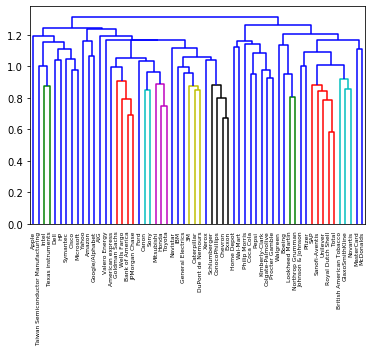

In [263]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

# Import normalize
from sklearn.preprocessing import normalize
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)

plt.show()


#### Cluster labels in hierarchial clustering
* Heights on dendrogram distance between merging clusters.
- Distance between two clusters is measured by "linkage method"
- In "complete" linkage distance betw clusters is max.distance between their samples.
- Use the fcluster() function
- Returns a NumPy array of cluster labels


In [267]:
from scipy.cluster.hierarchy import linkage
mergings=linkage(movements,method='complete')
from scipy.cluster.hierarchy import fcluster
labels=fcluster(mergings,15,criterion='distance')
print(labels) #This contains a numpy array containing cluster labels 

[35 29 33 23  9 18 25 18  6 26  1 18  3 21 18 18 18 36 32 18 14 18 19 31
 18 11 20 27 10  7 34 15  4 18 18 30  8 18 10 18 11 28 16 17  5 18 18 18
 24 16 18 18 18 22 12 20 13  2 18 18]


#### Aligning cluster labels with country names

In [268]:
import pandas as pd
pairs=pd.DataFrame({'labels':labels,'companies':companies})
print(pairs.sort_values('labels'))

    labels                           companies
10       1                      ConocoPhillips
57       2                               Exxon
12       3                             Chevron
32       4                                  3M
44       5                        Schlumberger
8        6                         Caterpillar
29       7                     Lookheed Martin
36       8                    Northrop Grumman
4        9                              Boeing
38      10                               Pepsi
28      10                           Coca Cola
25      11                   Johnson & Johnson
40      11                      Procter Gamble
54      12                            Walgreen
56      13                            Wal-Mart
20      14                          Home Depot
31      15                           McDonalds
42      16                   Royal Dutch Shell
49      16                               Total
43      17                                 SAP
46      18   

In [266]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


array([[20., 16., 24., ..., 14., nan, nan],
       [21., 15., 25., ..., 22., nan, nan],
       [22., 14., 23., ..., 24., nan, nan],
       ...,
       [ 2.,  2.,  3., ..., 19., 12., nan],
       [23., 15., 12., ..., 13., nan, nan],
       [15., 22.,  7., ..., 18., nan, nan]])

### t-SNE for 2-Dimdensional Maps
- t-SNE="t-distributed stochastic neighbor embedding"
- Maps samples to 2D space(or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets
- Has a fit_transform() method
- Simultaneously fits the model and transforms the data
- Has no separate fit() or transform() methods
- This means that you can't extend the map to include new data samples
- Must start over each time!
- For wrong learning rate; points bunch together


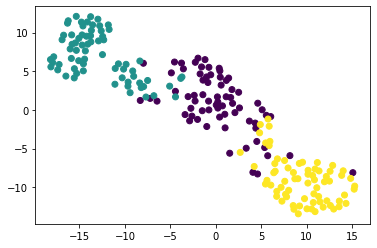

In [329]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model=TSNE(learning_rate=100)
transformed=model.fit_transform(samples)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

In [5]:
import pandas as pd
seeds=pd.read_csv('seeds.csv')
landw=pd.read_csv('seeds-width-vs-length.csv')
print(seed)
print(landw)
variety_numbers=seeds.iloc[:,7].values
samples=seeds.iloc[0:,:7].values


     15.26  14.84   0.871  5.763  3.312  2.221   5.22  1
0    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4    14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1
..     ...    ...     ...    ...    ...    ...    ... ..
204  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
205  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
206  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
207  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
208  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[209 rows x 8 columns]
     3.312  5.763
0    3.333  5.554
1    3.337  5.291
2    3.379  5.324
3    3.562  5.658
4    3.312  5.386
..     ...    ...
204  2.981  5.137
205  2.795  5.140
206  3.232  5.236
207  2.836  5.175
208  2.974  5.243

[209 rows x 2 columns]


#### VISUALIZING the PCA Transformation
- Dimension reduction: more efficient storage and computation
- Remove less-informative "noise" features
- PCA: Principal component analysis
- Shifts data samples so they have a mean 0
- No information is lost
    - PCA is a scikit-learn component like KMeans or Standard Scaler
    - fit() learns the transformation from give data and does not change it
    - transform() applies the learnet transformation
    - transform() method can be applied to new unseen samples
#### Pearson Correlation
- Measures linear correlation of features
- Value between -1 and 1
- Value of 0 means no linear correlation
##### Principal components
- "Principal components"=direction of variance
- PCA aligns principal components with the axes
 ###### available as components_attribute of PCA object
 - Each row defines displacement form ## THE MEAN ##
 

##### samples=array of two features(total_phenols& od280)

### Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

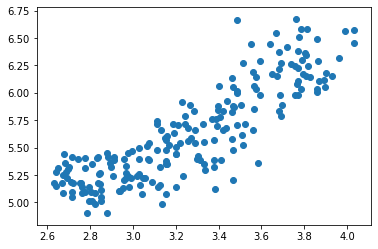

0.8604405325922296


In [345]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Assign the 0th column of grains: width
width = grains[:,0]


# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


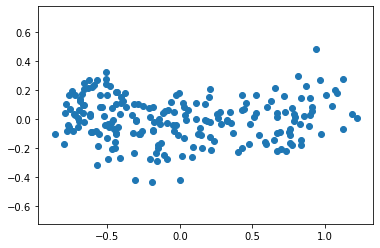

-8.326672684688674e-17


In [347]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

In [8]:
grains=landw.values
grains.shape
import matplotlib.pyplot as plt

### Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

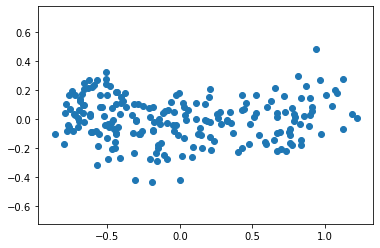

-8.326672684688674e-17


In [10]:
from scipy.stats import pearsonr

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

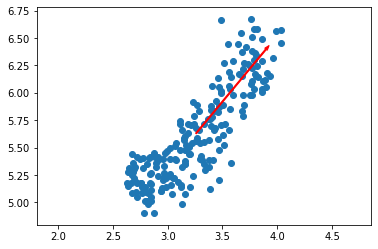

In [11]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Excellent job! This is the direction in which the grain data varies the most.

 ## Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [50]:
fish=pd.read_csv('fish.csv')
samples=fish.iloc[0:,1:].values
samples

array([[ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
       [ 650. ,   31. ,   33.5,

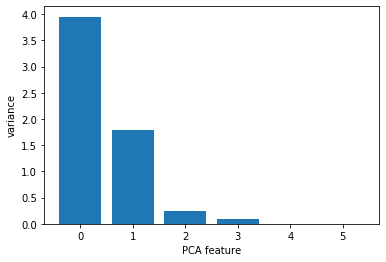

In [51]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


### Great work! It looks like PCA features 0 and 1 have significant variance. Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

## DIMENSION REDUCTION WİTH PCA
- PCA features are in decreasing order of variance
- Assume the low variance features are "noise"
- Specifies how many features to keep
- PCA(n_components=2) to keep the girst 2 PCA features
- Intrinsic dimension is good choice
- PCA discards low variance PCA features and assumes that high variance features are only informative
#### Word Frequency Arrays
* Rows represents documennts, columns reptesent words

In [57]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components: pca
pca = PCA(n_components=2)
pipeline = make_pipeline(scaler, pca)


# Fit the PCA instance to the scaled samples
pipeline.fit(samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(samples)

# Print the shape of pca_features
print(pca_features.shape)


(84, 2)


## A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

In [60]:
documents=['cats say meow','dogs say woof','dogs chase cats']
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [63]:
wiki=pd.read_csv('pageviews.csv')
wiki

MemoryError: 

### Clustering Wikipedia part I
You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from here.

In [168]:
import pandas as secret_pandas # since the import is part of the exercise!
from scipy.sparse import csr_matrix

df = secret_pandas.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2141/datasets/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

# a model solution to previous exercise
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6)
pipeline = make_pipeline(svd, kmeans)


In [81]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


### Clustering Wikipedia part II
It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

In [82]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
1       0                                 Alexa Internet
4       0                                  Google Search
5       0                                         Tumblr
7       0                                  Social search
9       0                                       LinkedIn
29      1                               Jennifer Aniston
20      1                                 Angelina Jolie
21      1                             Michael Fassbender
22      1                              Denzel Washington
23      1                           Catherine Zeta-Jones
25      1                                  Russell Crowe
26      1                                     Mila Kunis
27      1                                 Dakota Fanning
28      1                                  Anne Hathaway
24      1                                   Jessica Biel
19      2  2007 United Nations Climate Change Conference
18      2  2010 United Nations 

### Non-negative matrix factorization(NMF)
* Dimension reduction technique
* Unlike PCA, NMF models are interpretable.
* Easy to interpret means easy to explain!
* All sample features must be non-negative
* Follows fit()/transform() pattern
* Must specify number of components e.g.NMF(n_components=2)
* Works with both NumPy arrays and with csr_matrix
*

## NMF applied to Wikipedia articles
In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

In [176]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40452308e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66587702e-01]
 [3.82036019e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98634438e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81728391e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85502732e-01]
 [1.29281191e-02 1.37894802e-02 7.76303670e-03 3.34480998e-02
  0.00000000e+00 3.34511150e-01]
 [0.00000000e+00 0.00000000e+00 2.06734081e-02 0.00000000e+00
  6.04533162e-03 3.59050477e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90962081e-01]
 [1.54264004e-02 1.42823971e-02 3.76621867e-03 2.37104747e-02
  2.62641124e-02 4.80759815e-01]
 [1.11730154e-02 3.13690282e-02 3.09473953e-02 6.56983753e-02
  1.96694720e-02 3.38277815e-01]
 [0.00000000e+00 0.00000000e+00 5.30698032e-01 0.0

### NMF features of the Wikipedia articles
Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

In [90]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


0    0.003846
1    0.000000
2    0.000000
3    0.575689
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422364
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


## NMF reconstructs samples
In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values. On the right are the components of an NMF model. If the NMF feature values of a sample are [2, 1], then which of the following is most likely to represent the original sample? A pen and paper will help here! You have to apply the same technique Ben used in the video to reconstruct the sample [0.1203 0.1764 0.3195 0.141].

Possible answers: 
[2.2, 1.1, 2.1].

## NMF learns interpretable parts
There are
- 20,000 scientific articles(rows)
- 800 words(columns)
## NMF APPLİED FOR
- Documents
   - NMF components represents topics
   - NMF features combine topics into documents
- For images, NMF components are parts of images

### Grayscale images
- "Greyscale" image=no colors, only shades of gray

### Building recommender system

Which articles are similar to 'Cristiano Ronaldo'?
In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

In [85]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

ValueError: Shape of passed values is (6, 13125), indices imply (6, 6)

## Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [163]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [182]:
norm_features

array([[0.        , 0.0581029 , 0.        , ..., 0.        , 0.24860737,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.1878947 , ..., 0.29632599, 0.55910397,
        0.04161809],
       [0.        , 0.00555903, 0.00637576, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05551807, 0.        , ..., 0.        , 0.35644827,
        0.61469254]])

## Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

In [164]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


KeyError: 'Bruce Springsteen'

In [160]:
artist=pd.read_csv('artists.csv')
sample=pd.read_csv('sample.csv')
print(artist)
print(sample)

            Massive Attack
0                  Sublime
1             Beastie Boys
2               Neil Young
3            Dead Kennedys
4                  Orbital
..                     ...
105        Franz Ferdinand
106     The Postal Service
107      The Dresden Dolls
108            The Killers
109  Death From Above 1979

[110 rows x 1 columns]
      user_offset  artist_offset  playcount
0               1             79         58
1               1             84         80
2               1             86        317
3               1             89         64
4               1             96        159
...           ...            ...        ...
2889            0             75        371
2890            0             26         58
2891            0             52         58
2892            0             54         53
2893            0              1        128

[2894 rows x 3 columns]


In [141]:
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
from scipy import sparse
from scipy.sparse import csr_matrix

In [142]:
artists1 = sample.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
print(artists1.head())

     user_offset  artist_offset  playcount
21             2              0        105
96            15              0        165
147           20              0         91
151           21              0         98
208           29              0        120


In [143]:
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = sparse.coo_matrix((data1, (row_ind, col_ind)))
print(artists)
print(artists.shape)

  (0, 2)	105
  (0, 15)	165
  (0, 20)	91
  (0, 21)	98
  (0, 29)	120
  (0, 48)	236
  (0, 70)	67
  (0, 95)	77
  (0, 96)	93
  (0, 109)	98
  (0, 113)	63
  (0, 126)	63
  (0, 127)	429
  (0, 130)	151
  (0, 132)	103
  (0, 152)	83
  (0, 153)	65
  (0, 162)	54
  (0, 181)	456
  (0, 183)	592
  (0, 186)	111
  (0, 193)	158
  (0, 194)	53
  (0, 195)	216
  (0, 201)	89
  :	:
  (109, 444)	82
  (109, 450)	271
  (109, 467)	107
  (109, 472)	130
  (109, 478)	776
  (109, 483)	66
  (109, 498)	55
  (110, 56)	51
  (110, 60)	272
  (110, 119)	156
  (110, 149)	87
  (110, 165)	112
  (110, 291)	104
  (110, 325)	183
  (110, 345)	106
  (110, 358)	80
  (110, 360)	111
  (110, 361)	57
  (110, 414)	92
  (110, 429)	60
  (110, 433)	388
  (110, 460)	66
  (110, 463)	105
  (110, 465)	128
  (110, 468)	69
(111, 500)


##### Given a sparse array artists whose rows correspond to artists and whose column correspond to users. The entries give the number of times each artist was listened to by each user.

###### Build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to.  

In [134]:
scaler = MaxAbsScaler()
nmf = NMF(n_components=20)
normalizer = Normalizer()
pipeline = make_pipeline(scaler, nmf, normalizer)
norm_features = pipeline.fit_transform(artists)
#print(type(norm_features))
norm_features.shape

(111, 20)

In [161]:
artist_names = pd.read_csv('artists.csv',header=None)
print(artist_names)

                         0
0           Massive Attack
1                  Sublime
2             Beastie Boys
3               Neil Young
4            Dead Kennedys
..                     ...
106        Franz Ferdinand
107     The Postal Service
108      The Dresden Dolls
109            The Killers
110  Death From Above 1979

[111 rows x 1 columns]


In [136]:
artist_names1 = artist_names.values.tolist()
print(type(artist_names1))
print(len(artist_names1))
#print(artist_names1)

<class 'list'>
111


In [137]:
flattened = []
for sublist in artist_names1:
    for val in sublist:
        flattened.append(val)
        
flattened  = [val for sublist in artist_names1 for val in sublist]
flattened
df = pd.DataFrame(norm_features, index = flattened)

['Massive Attack',
 'Sublime',
 'Beastie Boys',
 'Neil Young',
 'Dead Kennedys',
 'Orbital',
 'Miles Davis',
 'Leonard Cohen',
 'Van Morrison',
 'NOFX',
 'Rancid',
 'Lamb',
 'Korn',
 'Dropkick Murphys',
 'Bob Dylan',
 'Eminem',
 'Nirvana',
 'Van Halen',
 'Damien Rice',
 'Elvis Costello',
 'Everclear',
 'Jimi Hendrix',
 'PJ Harvey',
 'Red Hot Chili Peppers',
 'Ryan Adams',
 'Soundgarden',
 'The White Stripes',
 'Madonna',
 'Eric Clapton',
 'Bob Marley',
 'Dr. Dre',
 'The Flaming Lips',
 'Tom Waits',
 'Moby',
 'Cypress Hill',
 'Garbage',
 'Fear Factory',
 '50 Cent',
 'Ani DiFranco',
 'Matchbox Twenty',
 'The Police',
 'Eagles',
 'Phish',
 'Stone Temple Pilots',
 'Black Sabbath',
 'Britney Spears',
 'Fatboy Slim',
 'System of a Down',
 'Simon & Garfunkel',
 'Snoop Dogg',
 'Aimee Mann',
 'Less Than Jake',
 'Rammstein',
 'Reel Big Fish',
 'The Prodigy',
 'Pantera',
 'Foo Fighters',
 'The Beatles',
 'Incubus',
 'Audioslave',
 'Bright Eyes',
 'Machine Head',
 'AC/DC',
 'Dire Straits',
 'Motör

Now use Normalized NMF features for recommendation. Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? Use NMF features and the cosine similarity to find top 10 similar musical artists.

In [139]:
artist = df.loc['Bruce Springsteen']
similarities = df.dot(artist)
print(similarities.nlargest(10))
# If someone listens songs of singer 'Bruce Springsteen' then he or she will also like songs by below listed Singers.

Bruce Springsteen    1.000000
Neil Young           0.957364
Van Morrison         0.876545
Leonard Cohen        0.868509
Bob Dylan            0.863663
Simon & Garfunkel    0.849805
Tom Waits            0.824331
Ryan Adams           0.806971
The Beach Boys       0.773697
Phish                0.770993
dtype: float64


# OTHER APPROACH
### Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [159]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


### Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.